**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# I. Perkenalan

## 1.1. Perkenalan

### Milestones 1 - P1

- Name   : Nabila Edelliana Khairunnisa
- Batch  : 011

### Description
Project tugas ini bertujuan untuk mendalami lebih lanjut dasar-dasar data science khususnya konsep Supervised Learning.

Data yang di olah merupakan data tentang informasi default credit card dengan keterangan sebagai berikut.
  - limit_bal: Amount of given credit in NT dollars (includes individual and family/supplementary credit
  - sex: Gender (1=male, 2=female)
  - education: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
  - marital_status: Marital status (1=married, 2=single, 3=others)
  - age: Age in years
  - pay_n*: Repayment status in specific month, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
  - bill_amtn*: Amount of bill statement in specific month, 2005 (NT dollar)
  - pay_amt*: Amount of previous payment in specific month, 2005 (NT dollar)
  - default_payment_next_month: Default payment (1=yes, 0=no)
  - * = the smallest n is the latest month


### Objective
1. Mampu memperoleh data menggunakan BigQuery
2. Mampu memahami konsep supervised learning
3. Mampu mempersiapkan data untuk digunakan dalam model supervised learning
4. Mampu mengimplementasikan supervised learning dengan data yang diberikan
5. Mampu melakukan evaluasi model
6. Mampu melakukan model tuning

### Problem Statement

1. Manakah algortima machine learning terbaik untuk dataset ini?
2. Bagaimanakah hyperparameter terbaik dari algoritma terbaik untuk dataset ini?
3. Bagaimana kualitas machine learning dari algoritma dan hyperparameter terbaiknya untuk dataset ini?

## 1.2. Query dari BigQuery

SELECT


limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month


FROM `bigquery-public-data.ml_datasets.credit_card_default`


LIMIT 21989;

limit : (tahun kelahiran = 1999) x (batch = 011) = 21989

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

# II. Import Pustaka yang Dibutuhkan

In [ ]:
# Library EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Library pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import warnings

# Library Model Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Library Evaluasi Model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

# Library Saving dan Open Model
import pickle

# III. Data Loading

In [ ]:
data = pd.read_csv('h8dsft_P1M1_Nabila_Edelliana_K.csv')
# Menampilkan head data
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [ ]:
# Menampilkan tail data
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
# Membuat salinan data untuk backup
data_copy = data.copy()

In [ ]:
# mengecek ukuran dataset
data.shape

(2965, 24)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

dataset ini terdiri dari kolom-kolom bertipe numerik. Akan tetapi, sebenarnya dataset ini mempunyai kolom-kolom bertipe kategorikal juga seperti `sex, education_level, marital_status, pay_n, dan default_payment_next_month`.

# IV. Exploratory Data Analysis (EDA)

## 4.1. Melihat missing value

In [ ]:
# Melihat data yang memiliki missing value
data.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Tidak ada missing values dalam data.

## 4.2. Melihat unique values kolom kategorikal

In [ ]:
data['sex'].unique()

array([1, 2])

sex: (1=male, 2=female)

In [ ]:
data['education_level'].unique()

array([1, 2, 3, 5, 4, 6, 0])

education_level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

Terdapat duplikat values yaitu value unknown dengan label 5 dan 6, kemudian ada pula label 0 yang tidak diketahui education_levelnya. Saya akan memasukkan value 0 dan 6 ke value 5.

In [ ]:
data['education_level'] = data.education_level.replace((6,0),(5,5), regex=True)

In [ ]:
data['education_level'].unique()

array([1, 2, 3, 5, 4])

In [ ]:
data['marital_status'].unique()

array([2, 1, 3, 0])

marital_status (1=married, 2=single, 3=others)

In [ ]:
data['pay_0'].unique()

array([ 0., -1.,  2.,  1.,  3., -2.,  4.,  5.,  6.,  7.,  8.])

(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

In [ ]:
data['default_payment_next_month'].unique()

array([0, 1])

default_payment_next_month (1=yes, 0=no)

In [ ]:
# menyalin data lagi untuk berjaga-jaga
df_new = data.copy()
df_new.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [ ]:
# mengganti nama kolom PAY_0 agar lebih bisa dimengerti karena yang lain untuk latest month kodenya 1.
df_new.rename(columns={'pay_0' : 'pay_1'}, inplace = True)
df_new.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


## 4.3. Melihat korelasi setiap kolom dengan target (default_payment_next_month)

### Korelasi categorical columns dengan grafik

In [ ]:
# membuat list kolom kategorikal
categorical_columns = ['sex', 'marital_status', 'education_level', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

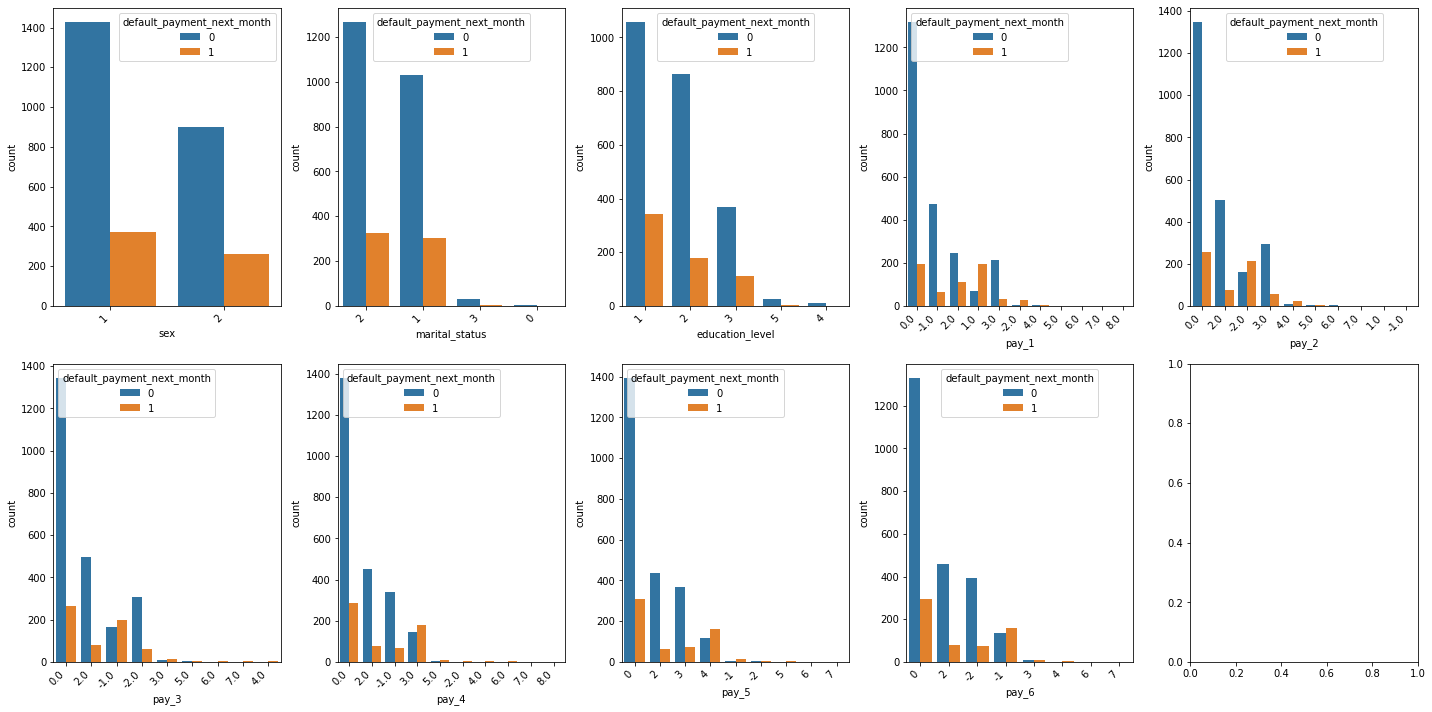

In [ ]:
fig, axes = plt.subplots(2,5, figsize = (20,10))

axes = np.ravel(axes)
for i in range(len(categorical_columns)):
    sns.countplot(data = df_new, x = categorical_columns[i], ax = axes[i], hue='default_payment_next_month', order = df_new[categorical_columns[i]].value_counts().index)
    axes[i].set_xticklabels(labels = df_new[categorical_columns[i]].unique(), rotation=45, ha='right')
axes = np.reshape(axes, (2, 5))
plt.tight_layout()

Apabila dilihat secara sepintas, target dataset ini imbalance yaitu value 0/not default untuk bulan depan jauh lebih banyak daripada value 1/default untuk bulan depan.

### Korelasi numerical columns dengan grafik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

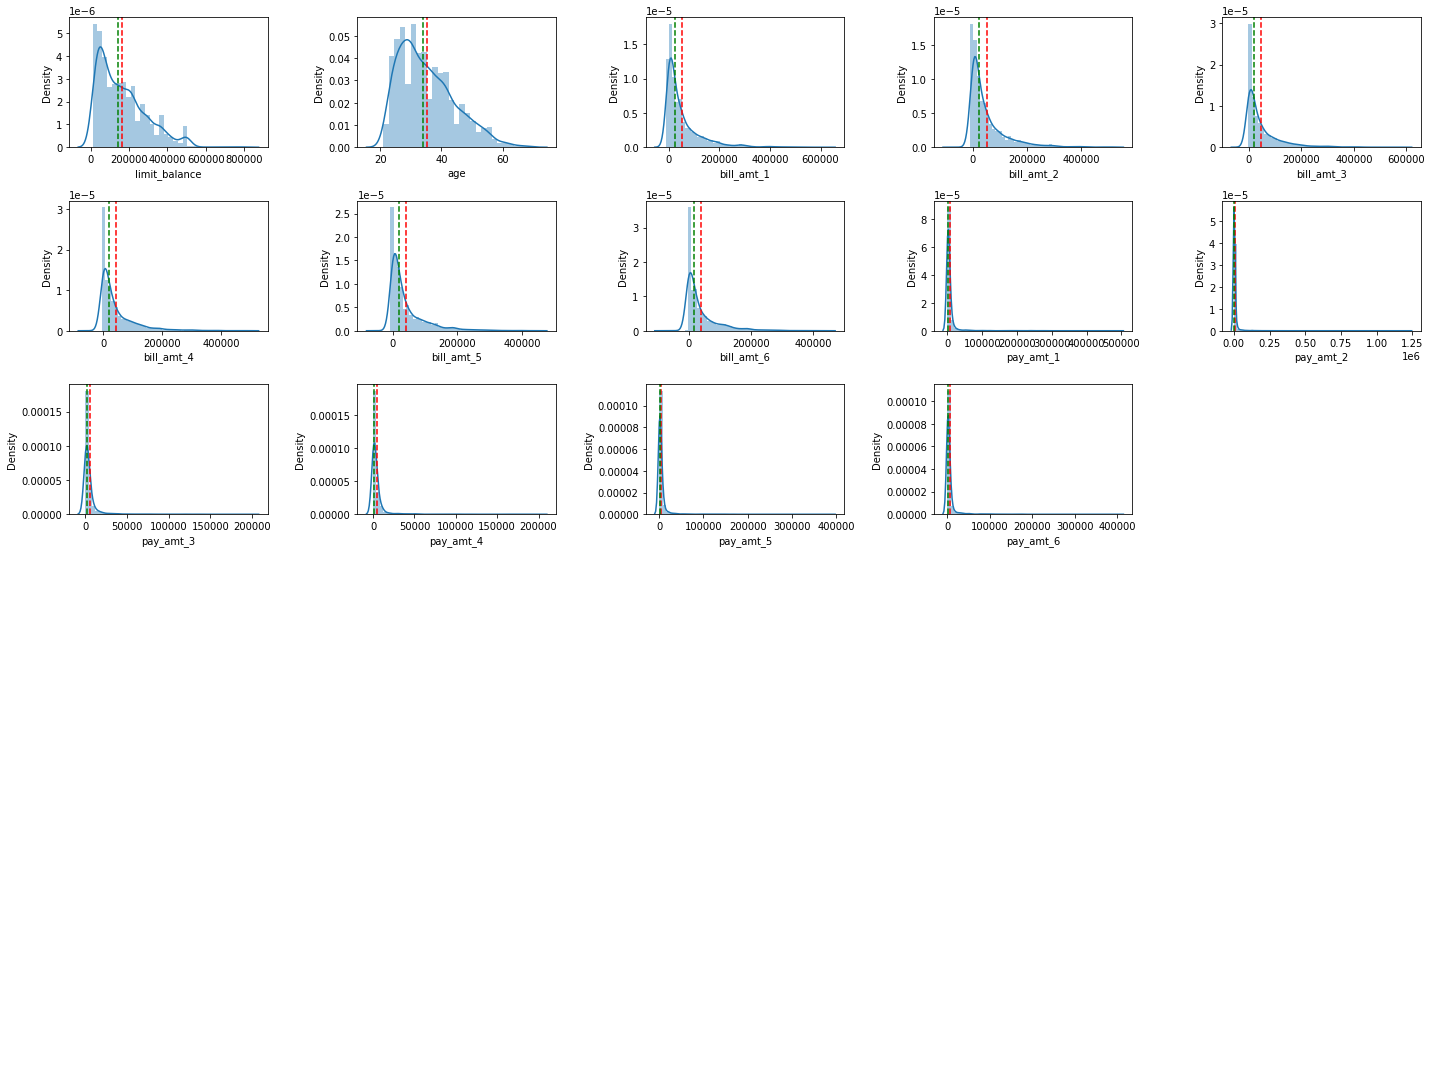

In [ ]:
# membuat list kolom numerikal
numeric_columns = ['limit_balance', 'age', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6']

# membuat fungsi untuk menampilkan grafik displot
def distplot(df, col, axes):
    sns.distplot(df[col], ax = axes)
    axes.axvline(df[col].mean(), linestyle = '--', color = "red")
    axes.axvline(df[col].median(), linestyle = '--', color = "green")

fig, axes = plt.subplots(6,5, figsize = (20,15))

# menampilkan distplot tiap kolom numerik untuk analisis korelasi
axes = np.ravel(axes)
for i in range(len(numeric_columns)):
    distplot(df_new, numeric_columns[i], axes[i])
for i in range(len(numeric_columns), 6*5):
    axes[i].axis("off")
axes = np.reshape(axes, (6, 5))
plt.tight_layout()
plt.show()

Apabila dilihat sepintas, dataset ini right-skewed.

korelasi di setiap kolom akan dilihat dari :
1. Distribusi data kolom tersebut dengan kolom target.
2. Chi-Square test.
    dilakukan dengan hypothesis testing dengan rules :
    - H0: tidak ada korelasi antara kolom dan kolom target
    - H1: ada korelasi antara kolom dan kolom target
    - P-Val < alpha (0.05) --> berhasil menolak H0
    - P-Val >= alpha (0.05) --> gagal menolak H0 --> kemungkinan ada korelasi --> masukkan kolom ke pemodelan

### 4.3.1. Melihat korelasi default_payment_next_month dan age

grafik korelasi

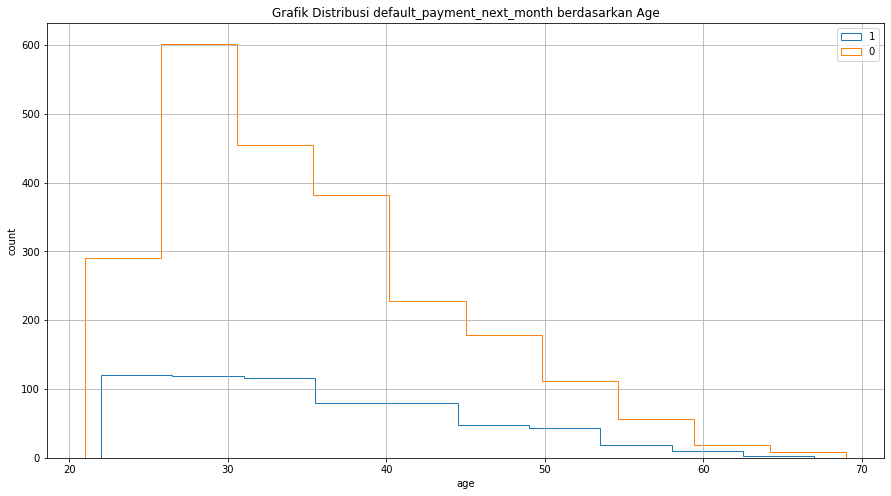

In [ ]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['default_payment_next_month'] == 1].age,
         histtype='step', label='1')
axes.hist(df_new[df_new['default_payment_next_month'] == 0].age,
         histtype='step', label='0')
axes.set_title('Grafik Distribusi default_payment_next_month berdasarkan Age')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('age')
axes.grid()

- sebagian esar data ini adalah orang-orang di usia antara 20-30 tahun.
- terdapat pattern dimana semakin tua usia, maka kemungkinan credit card default bulan depan semakin kecil

Chi-Square Age

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['default_payment_next_month'],
                            df_new['age'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['default_payment_next_month'].unique()
columns = data['age'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 56.93225473924361  and p value is: 0.17679420406607826
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 56.93225473924361  and critical value is: 65.17076890356982
Failed to reject the null hypothesis.


berdasarkan perhitungan chi-square test, terdapat kemungkinan age tidak berkorelasi dengan target. Akan tetapi berdasarkan distribusinya di grafik korelasi, terdapat pattern yang menarik antara age dan target.

conclusion : age dimasukkan sebagai fitur ke model ML.

### 4.3.2. Melihat korelasi default_payment_next_month dan sex

grafik korelasi

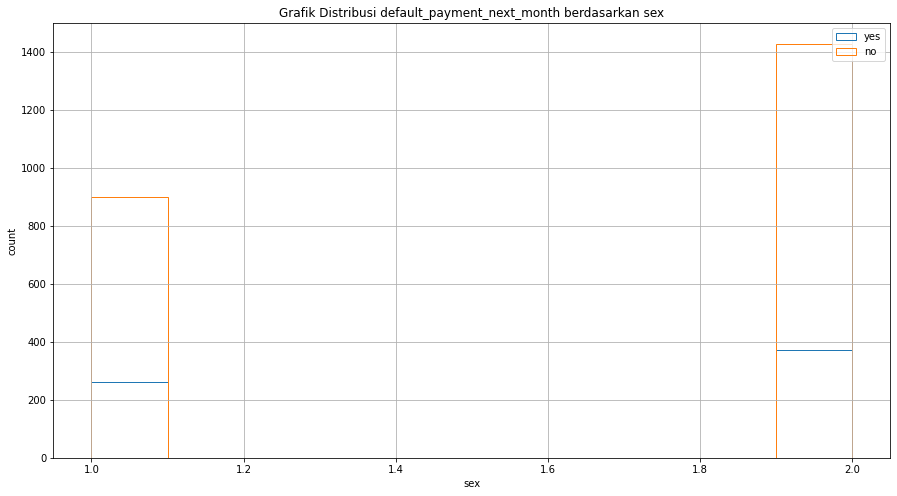

In [ ]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['default_payment_next_month'] == 1].sex,
         histtype='step', label='yes')
axes.hist(df_new[df_new['default_payment_next_month'] == 0].sex,
         histtype='step', label='no')
axes.set_title('Grafik Distribusi default_payment_next_month berdasarkan sex')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('sex')
axes.grid()

Berdasarkan grafik:
- sebagian besar gender data ini female (2)
- gender female memiliki probabilitas lebih besar untuk default kartu kreditnya bulan depan.

Chi-Square sex

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['default_payment_next_month'],
                            df_new['sex'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['default_payment_next_month'].unique()
columns = data['sex'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1.4045101337994392  and p value is: 0.23596988449992484
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 1.4045101337994392  and critical value is: 3.841458820694124
Failed to reject the null hypothesis.


berdasarkan perhitungan chi-square test, terdapat kemungkinan sex tidak berkorelasi dengan target. Akan tetapi berdasarkan distribusinya di grafik korelasi, terdapat pattern yang menarik antara sex dan target.

conclusion : sex dimasukkan sebagai fitur ke model ML.

### 4.3.3. Melihat korelasi default_payment_next_month dan education_level

grafik korelasi

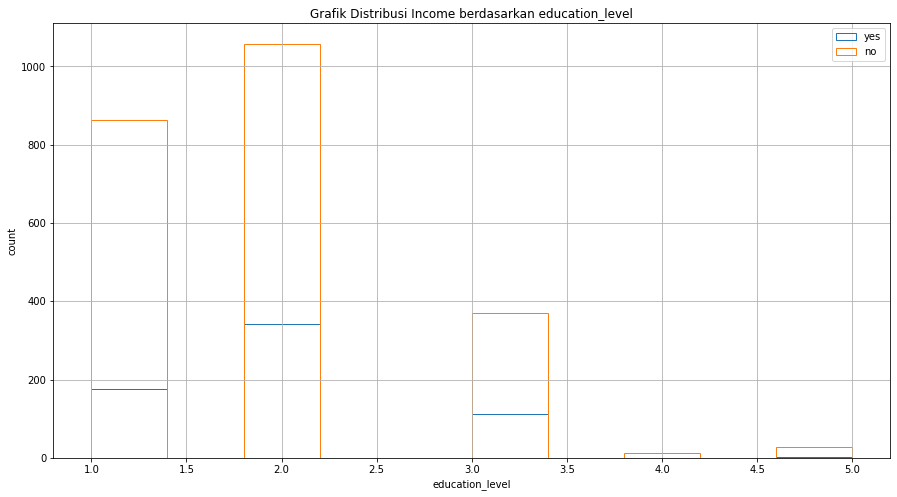

In [ ]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['default_payment_next_month'] == 1].education_level,
         histtype='step', label='yes')
axes.hist(df_new[df_new['default_payment_next_month'] == 0].education_level,
         histtype='step', label='no')
axes.set_title('Grafik Distribusi Income berdasarkan education_level')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('education_level')
axes.grid()

education_level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

Berdasarkan grafik:
- sebagian besar education_level data ini adalah university
- orang-orang dengan education level university memiliki probabilitas terbesar untuk default kartu kreditnya bulan depan

Chi-Square education_level

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['default_payment_next_month'],
                            df_new['education_level'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['default_payment_next_month'].unique()
columns = data['education_level'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 26.38560660360795  and p value is: 2.6454923444885203e-05
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 26.38560660360795  and critical value is: 9.487729036781154
Null Hypothesis is rejected.


berdasarkan perhitungan chi-square test, diambil kesimpulan bahwa terdapat korelasi antara default_payment_next_month dengan education_level.

conclusion : education_level dimasukkan sebagai fitur ke model ML.

### 4.3.4. Melihat korelasi default_payment_next_month dan marital_status

grafik korelasi

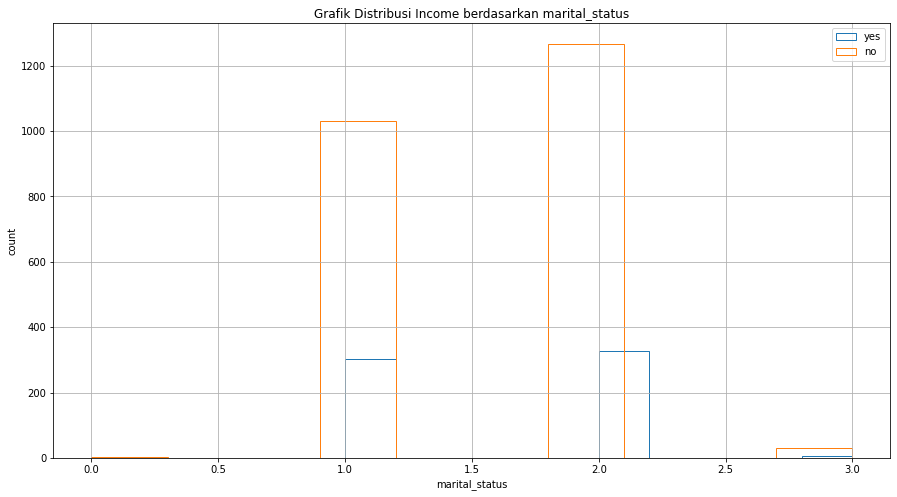

In [ ]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['default_payment_next_month'] == 1].marital_status,
         histtype='step', label='yes')
axes.hist(df_new[df_new['default_payment_next_month'] == 0].marital_status,
         histtype='step', label='no')
axes.set_title('Grafik Distribusi Income berdasarkan marital_status')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('marital_status')
axes.grid()

marital_status (1=married, 2=single, 3=others)

Berdasarkan grafik:
- sebagian besar data ini adalah orang-orang yang memiliki marital_status single

Chi-Square marital_status  

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['default_payment_next_month'],
                            df_new['marital_status'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['default_payment_next_month'].unique()
columns = data['marital_status'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 3.4895444774651327  and p value is: 0.3221207009667394
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 3.4895444774651327  and critical value is: 7.814727903251179
Failed to reject the null hypothesis.


berdasarkan perhitungan chi-square test, terdapat kemungkinan marital_status tidak berkorelasi dengan target. Akan tetapi berdasarkan distribusinya di grafik korelasi, terdapat pattern yang menarik antara marital_status dan target.

conclusion : marital_status dimasukkan sebagai fitur ke model ML.

### 4.3.5. Melihat korelasi default_payment_next_month dan pay_1

analisis korelasi dengan pay_1 mewakili analisis dengan pay_n. n = payment bulan tertentu.

grafik korelasi

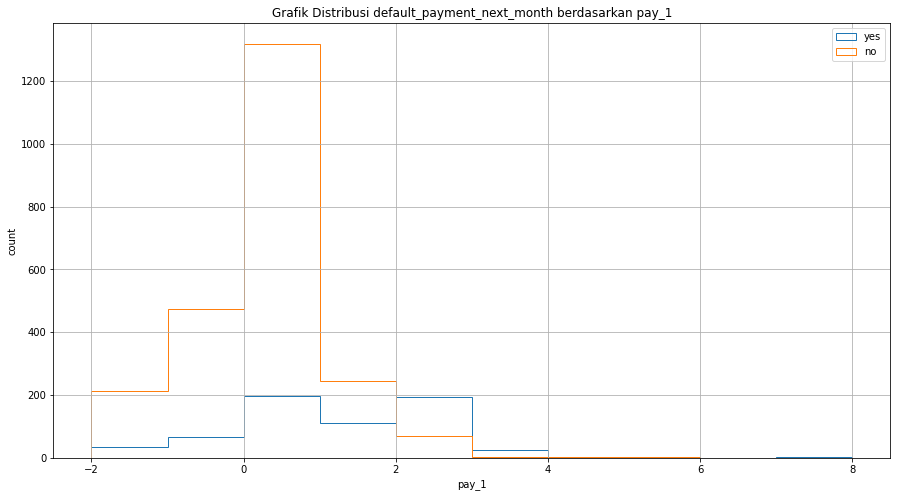

In [ ]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['default_payment_next_month'] == 1].pay_1,
         histtype='step', label='yes')
axes.hist(df_new[df_new['default_payment_next_month'] == 0].pay_1,
         histtype='step', label='no')
axes.set_title('Grafik Distribusi default_payment_next_month berdasarkan pay_1')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('pay_1')
axes.grid()

(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

Berdasarkan grafik:
- sebagian besar data ini adalah orang-orang dengan payment lateness 0 month
- orang-orang dengan payment lateness 2 bulan memiliki probabilitas default kredit cardnya bulan depan.

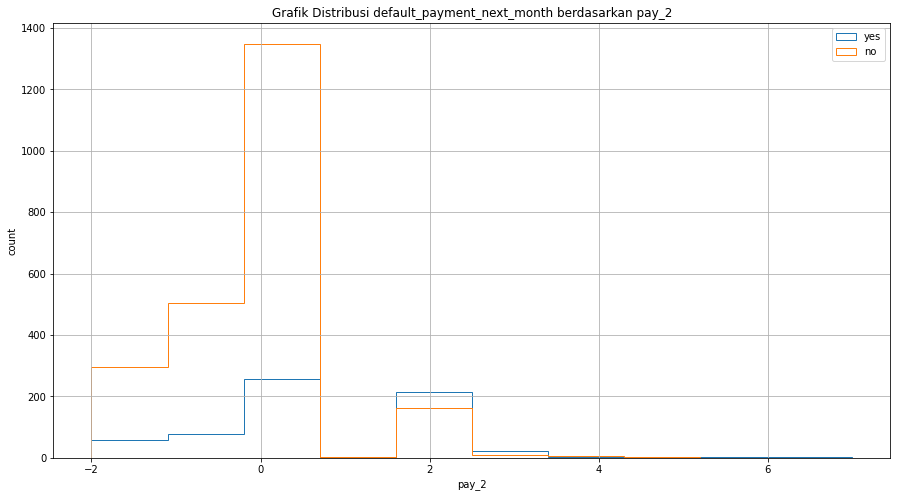

In [ ]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['default_payment_next_month'] == 1].pay_2,
         histtype='step', label='yes')
axes.hist(df_new[df_new['default_payment_next_month'] == 0].pay_2,
         histtype='step', label='no')
axes.set_title('Grafik Distribusi default_payment_next_month berdasarkan pay_2')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('pay_2')
axes.grid()

Diambil kesimpulan bahwa bisa jadi terdapat korelasi antara default_payment_next_month dengan payment delay. conclusion : pay_n dimasukkan sebagai fitur ke model ML

### 4.3.6. Melihat korelasi default_payment_next_month dan bill_amt_1

grafik korelasi

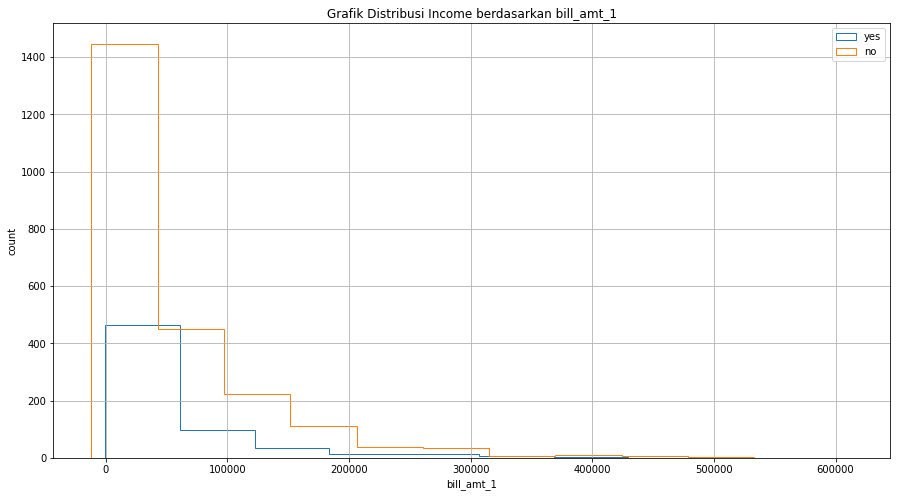

In [ ]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['default_payment_next_month'] == 1].bill_amt_1,
         histtype='step', label='yes')
axes.hist(df_new[df_new['default_payment_next_month'] == 0].bill_amt_1,
         histtype='step', label='no')
axes.set_title('Grafik Distribusi Income berdasarkan bill_amt_1')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('bill_amt_1')
axes.grid()

Berdasarkan grafik:
- sebagian besar data ini adalah orang-orang dengan range bill_amount_1 0-100000.
- semakin besar bill_amt_1, semakin kecil kemungkinan default kredit cardnya bulan depan. akan tetapi, hal yang sama terjadi dengan kemungkinan tidak default.

Chi-Square bill_amt_1

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['default_payment_next_month'],
                            df_new['bill_amt_1'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['default_payment_next_month'].unique()
columns = data['bill_amt_1'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 2614.8921958453598  and p value is: 0.642452320297622
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 2614.8921958453598  and critical value is: 2762.6924503003015
Failed to reject the null hypothesis.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi tidak ada korelasi antara default_payment_next_month dengan bill_amt_1. Kemudian, berdasarkan grafik, probabilitas antara default dan not default menunjukkan pattern yang sama seiring bertambahnya bill_amt_1 yang mengindikasikan kolom ini tidak cocok untuk prediksi default_payment_next_month.

conclusion : bill_amt_n tidak dimasukkan sebagai fitur ke model ML

### 4.3.7. Melihat korelasi default_payment_next_month dan pay_amt_1

grafik korelasi

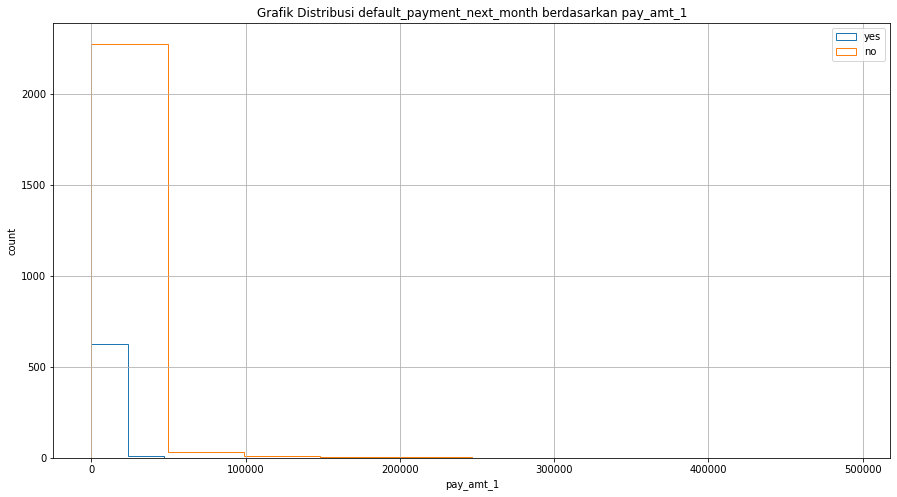

In [ ]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['default_payment_next_month'] == 1].pay_amt_1,
         histtype='step', label='yes')
axes.hist(df_new[df_new['default_payment_next_month'] == 0].pay_amt_1,
         histtype='step', label='no')
axes.set_title('Grafik Distribusi default_payment_next_month berdasarkan pay_amt_1')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('pay_amt_1')
axes.grid()

Berdasarkan grafik:
- sebagian besar data ini adalah orang-orang yang memiliki pay amount di range 0-50000.
- grafik menunjukkan kurangnya korelasi antara pay amount dengan default_payment_next_month.

Chi-Square pay_amt_1

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['default_payment_next_month'],
                            df_new['pay_amt_1'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['default_payment_next_month'].unique()
columns = data['pay_amt_1'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1235.0950338270407  and p value is: 0.9997716178017971
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 1235.0950338270407  and critical value is: 1502.5937621561027
Failed to reject the null hypothesis.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi tidak ada korelasi antara default_payment_next_month dengan pay_amt_1. Kemudian, berdasarkan grafik, probabilitas antara default dan tidak menunjukkan pattern yang sama seiring bertambahnya pay_amt_1 yang mengindikasikan kolom ini tidak cocok untuk prediksi default_payment_next_month.

conclusion : pay_amt_n tidak dimasukkan sebagai fitur ke model ML

### 4.3.8. Melihat korelasi default_payment_next_month dan limit_balance

grafik korelasi

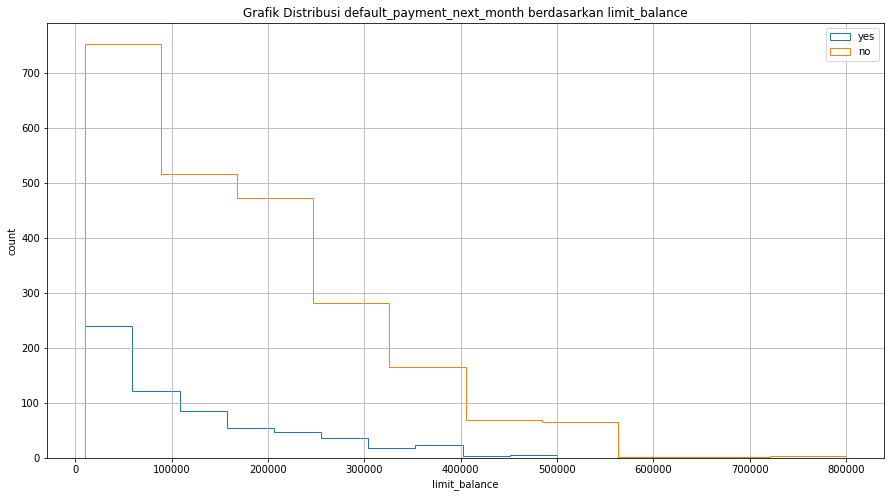

In [ ]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['default_payment_next_month'] == 1].limit_balance,
         histtype='step', label='yes')
axes.hist(df_new[df_new['default_payment_next_month'] == 0].limit_balance,
         histtype='step', label='no')
axes.set_title('Grafik Distribusi default_payment_next_month berdasarkan limit_balance')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('limit_balance')
axes.grid()

Berdasarkan grafik:
- sebagian besar data ini adalah orang-orang yang memiliki limit balance di range 0-100000.
- semakin besar limit balance, semakin kecil kemungkinan default kartu kreditnya bulan depan. Walaupun value yes memiliki pattern yang mirip dengan value no, kolom ini masih bisa dijadikan fitur dalam machine learning.

Chi-Square limit_balance

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['default_payment_next_month'],
                            df_new['limit_balance'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['default_payment_next_month'].unique()
columns = data['limit_balance'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 149.27007704029145  and p value is: 5.542216685583412e-10
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 149.27007704029145  and critical value is: 76.7778031560615
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara default_payment_next_month dengan limit_balance. 

conclusion : limit_balance dimasukkan sebagai fitur ke model ML

### **fitur yang masuk dalam pemodelan :**

age, sex, education_level, marital_status, pay_n, limit_balance

## 4.2. Melihat statistik kolom numerik

In [ ]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.851602,0.774663,1.0,1.0,2.0,2.0,5.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_1,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_1                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

# V. Data Preprocessing

## 5.1. Drop kolom yang tidak dipakai untuk pemodelan

In [ ]:
# menampilkan judul kolom dataset
df_new.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

In [ ]:
# menghapus kolom yang tidak digunakan untuk pemodelan
df_new.drop(columns=['bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6'], inplace=True)
df_new.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,0


## 5.2. Get data for model inference

In [ ]:
# Get data for model inference.
# Data inference tidak boleh ada di train dan test. jadi datanya tuh dibagi buat 3 peruntukan.

data_inf = df_new.sample(10, random_state=9)   # ambil 10 sampel, random state gunanya untuk biar ga berubah2, nilainya 9. Nilainya terserah gada pengaruhnya
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
2434,200000.0,1,2,1,39.0,-1.0,-1.0,2.0,-1.0,0,0,0
2925,180000.0,2,2,2,29.0,-1.0,-1.0,-2.0,-2.0,-2,-2,0
180,210000.0,1,5,1,31.0,2.0,0.0,0.0,0.0,0,-1,0
1879,30000.0,2,1,2,27.0,1.0,2.0,0.0,0.0,2,0,0
2738,350000.0,2,1,1,55.0,-1.0,-1.0,-1.0,-1.0,-1,-1,0
2570,220000.0,1,2,1,40.0,-1.0,-1.0,-1.0,-1.0,-1,-1,0
422,50000.0,2,1,2,25.0,0.0,0.0,0.0,0.0,0,0,0
358,20000.0,1,2,1,25.0,0.0,0.0,0.0,0.0,0,0,0
1979,170000.0,1,1,2,32.0,2.0,2.0,-2.0,-2.0,-2,-1,1
2474,50000.0,1,2,2,23.0,-1.0,-1.0,-1.0,-1.0,0,0,0


In [ ]:
# Remove inference-set

data_train_test = df_new.drop(data_inf.index)
data_train_test.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,0


In [ ]:
# Reset index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_train_test.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,0


## 5.2. Splitting Dataset

In [ ]:
# Split between 'X' (features) and 'y' (target)
X = data_train_test.drop('default_payment_next_month', axis = 1)
y = data_train_test['default_payment_next_month']
X.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
# Split between train-set and test-set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17) # sebanyak 20% data jadi data test, 80% train

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (2364, 11)
Test Size :  (591, 11)


## 5.3. Outlier Handling

Saya akan handling outlier untuk kolom numerikal yaitu kolom `age` dan `limit_balance`

### 5.3.1. Outlier Detection

Checking normality of the data distribution

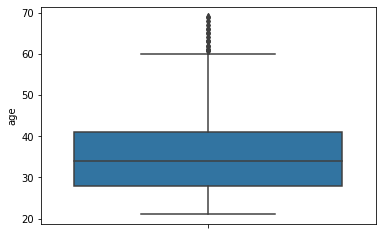

In [ ]:
sns.boxplot(y=X_train['age'])

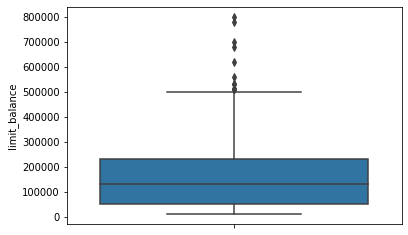

In [ ]:
sns.boxplot(y=X_train['limit_balance'])

In [ ]:
X_train['age'].skew()

0.7734975791839716

In [ ]:
X_train['limit_balance'].skew()

1.044636835109497

data yang skew adalah data dengan skewness <-0.5 dan >0.5 dan akan dideteksi outliernya dengan metode IQR. Data yang tidak skew dideteksi dengan metode std.

kolom `age` dan kolom `limit_balance` memiliki skewness > 0.5 sehingga kolom ini right-skewed.

Outliers Detection - IQR

In [ ]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

Outlier detection - IQR : age

In [ ]:
upper_age, lower_age = find_skewed_boundaries(X_train, 'age',1.5)
upper_age, lower_age

(60.5, 8.5)

In [ ]:
print('Total data: {}'.format(len(X_train)))
print('Data with age bigger than 60.5   : {}'.format(len([X_train['age'] > upper_age])))
print('')
print('% data with age bigger than 60.5 : {}'.format(len([X_train['age'] > upper_age])/len(X_train) * 100))

Total data: 2364
Data with age bigger than 60.5   : 1

% data with age bigger than 60.5 : 0.04230118443316413


Outlier detection - IQR : limit_balance

In [ ]:
upper_lb, lower_lb = find_skewed_boundaries(X_train, 'limit_balance', 1.5)
upper_lb, lower_lb

(500000.0, -220000.0)

In [ ]:
print('Total data: {}'.format(len(X_train)))
print('Data with limit_balance bigger than 500000.0   : {}'.format(len([X_train['limit_balance'] > upper_lb])))
print('% data with limit_balance bigger than 500000.0 : {}'.format(len([X_train['limit_balance'] > upper_lb])/len(X_train) * 100))

Total data: 2364
Data with limit_balance bigger than 500000.0   : 1
% data with limit_balance bigger than 500000.0 : 0.04230118443316413


Ternyata untuk kolom `age` dan `limit_balance` hanya ada kurang dari 1% outlier dari keseluruhan data train. Maka saya akan lakukan metode trimming untuk handling outliers.

### 5.3.2. Outliers Handling - Trimming

Trimming kolom `age`

In [ ]:
# mengecek count, min, dan max data X_train awal
X_train['age'].describe()

count    2364.000000
mean       35.205584
std         9.112874
min        21.000000
25%        28.000000
50%        34.000000
75%        41.000000
max        69.000000
Name: age, dtype: float64

data awal X_train
- banyak data : 2364
- nilai minimal ['age']: 21
- nilai maksimal ['age'] : 69

In [ ]:
# drop data X_train berdasarkan index yang memenuhi syarat outlier
index1 = X_train[(X_train['age'] > upper_age)].index
X_train.drop(index1, inplace=True)

# mengecek count, min, dan max data X_train setelah di trimming 1
X_train['age'].describe()

count    2342.000000
mean       34.938514
std         8.722773
min        21.000000
25%        28.000000
50%        33.000000
75%        41.000000
max        60.000000
Name: age, dtype: float64

data X_train trimming I
- banyak data : 2342
- nilai minimal ['age'] : 21
- nilai maksimal ['age'] : 60

In [ ]:
# mengecek count awal y_train
print(y_train.value_counts())

0    1857
1     507
Name: default_payment_next_month, dtype: int64


data awal y_train
- banyak data : 1857 + 507 = 2364

In [ ]:
# drop data y_train berdasarkan index yang memenuhi syarat outlier
y_train.drop(index1, inplace=True)

# mengecek count y_train setelah di trimming 1
y_train.value_counts()

0    1839
1     503
Name: default_payment_next_month, dtype: int64

data y_train setelah trimming I
- banyak data : 1839 + 503 = 2342

Trimming kolom `limit_balance`

In [ ]:
# mengecek count, min, dan max data X_train setelah trimming 1
X_train['limit_balance'].describe()

count      2342.000000
mean     161225.448335
std      125595.689481
min       10000.000000
25%       50000.000000
50%      130000.000000
75%      230000.000000
max      800000.000000
Name: limit_balance, dtype: float64

data X_train sebelum trimming II 
- banyak data : 2342
- nilai minimal ['limit_balance'] : 10000
- nilai maksimal ['limit_balance'] : 800000

In [ ]:
# drop data X_train berdasarkan index yang memenuhi syarat outlier
index2 = X_train[(X_train['limit_balance'] > upper_lb)|(X_train['limit_balance'] < lower_lb)].index
X_train.drop(index2, inplace=True)

# mengecek count, min, dan max data X_train setelah di trimming 2
X_train['limit_balance'].describe()

count      2332.000000
mean     159249.571184
std      121980.276253
min       10000.000000
25%       50000.000000
50%      130000.000000
75%      230000.000000
max      500000.000000
Name: limit_balance, dtype: float64

data X_train setelah trimming II 
- banyak data : 2332
- nilai minimal ['hours_per_week] : 10000
- nilai maksimal ['hours_per_week] : 500000

In [ ]:
# mengecek count awal y_train
print(y_train.value_counts())

0    1839
1     503
Name: default_payment_next_month, dtype: int64


data y_train sebelum trimming II 
- banyak data : 1839 + 503 = 2342

In [ ]:
# drop data y_train berdasarkan index yang memenuhi syarat outlier
y_train.drop(index2, inplace=True)

# mengecek count y_train setelah di trimming 2
y_train.value_counts()

0    1829
1     503
Name: default_payment_next_month, dtype: int64

data y_train setelah trimming II 
- banyak data : 1829 + 503 = 2332

In [ ]:
# menghitung persentase data yang dilakukan trimming
# (data awal -  data trimming) / data awal * 100
(2364 - 2332) / 2364 * 100

1.353637901861252

## 5.4. Handling Missing Value

### 5.4.1. Check Missing Values

In [ ]:
X_train.isna().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
dtype: int64

In [ ]:
X_test.isna().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
dtype: int64

In [ ]:
y_train.isna().sum()

0

In [ ]:
y_test.isna().sum()

0

tidak ada missing values. lanjut ke tahap berikutnya.

## 5.5. Feature Selection

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 810 to 2671
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_balance    2332 non-null   float64
 1   sex              2332 non-null   int64  
 2   education_level  2332 non-null   int64  
 3   marital_status   2332 non-null   int64  
 4   age              2332 non-null   float64
 5   pay_1            2332 non-null   float64
 6   pay_2            2332 non-null   float64
 7   pay_3            2332 non-null   float64
 8   pay_4            2332 non-null   float64
 9   pay_5            2332 non-null   int64  
 10  pay_6            2332 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 218.6 KB


terdapat kolom categorical yang tipenya masih belum berupa categorical. Selanjutnya kolom tersebut akan diubah ke tipe categorical supaya memudahkan proses feature selection.

In [ ]:
# mengubah tipe data categorical features dari numerik ke category
X_train.sex = X_train.sex.astype("category")
X_train.education_level = X_train.education_level.astype("category")
X_train.marital_status = X_train.marital_status.astype("category")
X_train.pay_1 = X_train.pay_1.astype("category")
X_train.pay_2 = X_train.pay_2.astype("category")
X_train.pay_3 = X_train.pay_3.astype("category")
X_train.pay_4 = X_train.pay_4.astype("category")
X_train.pay_5 = X_train.pay_5.astype("category")
X_train.pay_6 = X_train.pay_6.astype("category")

In [ ]:
y_train = y_train.astype("category")

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 810 to 2671
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   limit_balance    2332 non-null   float64 
 1   sex              2332 non-null   category
 2   education_level  2332 non-null   category
 3   marital_status   2332 non-null   category
 4   age              2332 non-null   float64 
 5   pay_1            2332 non-null   category
 6   pay_2            2332 non-null   category
 7   pay_3            2332 non-null   category
 8   pay_4            2332 non-null   category
 9   pay_5            2332 non-null   category
 10  pay_6            2332 non-null   category
dtypes: category(9), float64(2)
memory usage: 77.8 KB


In [ ]:
# Get numerical columns and categorical columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object','category']).columns.tolist()

print('Numerical columns : ', num_columns)
print('Categorical columns : ', cat_columns)

Numerical columns :  ['limit_balance', 'age']
Categorical columns :  ['sex', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


In [ ]:
# Split Train-set and Test-set based on column types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## 5.6. Feature Scaling

Karena datanya terdistribusi skewed, saya akan menggunakan MinMaxScaler. Saya akan mengatur range nya dari 0 s/d 1 untuk memudahkan pemahaman data.

In [ ]:
# Feature scaling using MinMaxScaler, defaultnya jadi range 0 s/d 1

scaler = MinMaxScaler()
scaler.fit(X_train_num) # .fit hanya milik train

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.14285714, 0.61538462],
       [0.67346939, 0.15384615],
       [0.26530612, 0.56410256],
       ...,
       [0.12244898, 0.1025641 ],
       [0.6122449 , 0.12820513],
       [0.40816327, 0.48717949]])

## 5.7. Feature Encoding

Karena datanya terdistribusi skew dan categorical datanya tidak bertingkat, saya akan menggunakan OneHotEncoder. Perlu digaris-bawahi, kolom education_level memiliki value unknown sehingga tidak bisa diencode menggunakan OrdinalEncoder.

In [ ]:
# feature Encoding using OneHotlEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
X_train_cat.head()

,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
810,1,3,1,0.0,0.0,0.0,0.0,0,0
2575,2,2,2,-1.0,-1.0,-1.0,-1.0,-1,-1
366,2,3,2,0.0,0.0,0.0,0.0,0,0
2622,2,2,2,-1.0,-1.0,-1.0,-1.0,-1,-1
2891,1,1,1,-1.0,-1.0,-1.0,-1.0,-2,-2


## 5.8. Merge/Concat between scaled num columns and encoded cat columns

In [ ]:
# Concat columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final

array([[0.14285714, 0.61538462, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.67346939, 0.15384615, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26530612, 0.56410256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12244898, 0.1025641 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.6122449 , 0.12820513, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.40816327, 0.48717949, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Display as DataFrame

X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.142857,0.615385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.673469,0.153846,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.265306,0.564103,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.183673,0.051282,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.795918,0.717949,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# VI. Model Definition

## 6.1. Cross Validation Base Model

In [ ]:
log_model = LogisticRegression()
svc_model = SVC()  # SVM untuk data kategorikal adalah SVC
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
ada_model = AdaBoostClassifier()

In [ ]:
# Cross-validation untuk base model

# Menyiapkan model dalam list
models = []
models.append(('log', log_model))
models.append(('svc', svc_model))
models.append(('dt', dt_model))
models.append(('rf', rf_model))
models.append(('knn', knn_model))
models.append(('nb', nb_model))
models.append(('ada', ada_model))

# Menyiapkan list kosong untuk wadah hasil cross validation
names = []
results = []
mean_score = []
stdev_score = []

# Melakukan Cross Validation setiap model
for name, model in models:
    model.fit(X_train_final_df,y_train)
    scores = cross_val_score(model, X_train_final_df, y_train, scoring='accuracy', cv=5, n_jobs=-1)

    names.append(name)
    results.append(scores)
    mean_score.append(round(np.mean(scores),4))
    stdev_score.append(round(np.std(scores),4))

cv_result = pd.DataFrame({'models':names, 'mean_accu':mean_score, 'stdev_accu':stdev_score})

In [ ]:
cv_result.sort_values(by='mean_accu', ascending=False)

,models,mean_accu,stdev_accu
1,svc,0.8341,0.0158
0,log,0.8336,0.0180
6,ada,0.8323,0.0170
4,knn,0.8152,0.0119
3,rf,0.8113,0.0118
5,nb,0.8105,0.0183
2,dt,0.7359,0.0171


model yang memiliki rerata akurasi tertinggi adalah model SVM SVC. Hal ini wajar karena model ini terkenal dengan kelebihannya sebagai machine learing yang baik untuk data categorical dengan lebih dari 2 fitur. Selanjutnya saya akan menggunakan algoritma ini untuk pemodelan machine learning dengan terlebih dahulu mencari best hyperparameternya.

## 6.2. Hyperparameter Tuning SVM-SVC

Saya akan mencari model terbaik dari SVC dengan hyperparameter tuning menggunakan GridSearchCV. Saya hanya akan menggunakan kernel RBF karena agar hyperplane lebih fleksibel dalam mengklasifikasikan model sehingga harapannya didapatkan akurasi model yang lebih baik.

In [ ]:
svc_model = SVC()
parameters_svc = {'C':[0.0001, 0.001, 0.1, 1, 10, 100],
                  'gamma':[0.0001, 0.001, 0.1, 1, 10, 100],
              'kernel': ['rbf']
              }

grid_svc = GridSearchCV(estimator=svc_model, param_grid=parameters_svc, scoring='accuracy',cv=3, verbose=1, n_jobs=-1)
grid_svc.fit(X_train_final_df,y_train)
grid_svc.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Hyperparameter terbaik untuk model SVM-SVC :
- C = 1
- gamma = 0.1

# VII. Model Training 

In [ ]:
best_svc_model = SVC(C=1, gamma=1, kernel = 'rbf')
best_svc_model.fit(X_train_final_df,y_train)

SVC(C=1, gamma=1)

# VIII. Model Evaluation

In [ ]:
print('Classification Report SVC Model\n',classification_report(y_test, best_svc_model.predict(X_test_final)))

Classification Report SVC Model
               precision    recall  f1-score   support

           0       0.82      0.98      0.89       464
           1       0.74      0.20      0.32       127

    accuracy                           0.81       591
   macro avg       0.78      0.59      0.61       591
weighted avg       0.80      0.81      0.77       591



**Model SVM-SVC**
- dari seluruh data yang terprediksi 0/not default, ada 0.82 data yang benar-benar not default.
- dari seluruh data aktual 0/not default, terdapat 0.98 data yang terprediksi not default.
- terdapat 89% data terprediksi 0/not default yang benar.


- dari seluruh data yang terprediksi 1/default, ada 0.74 data yang benar-benar default.
- dari seluruh data aktual 1/default, terdapat 0.20 data yang terprediksi default
- terdapat 32% data terprediksi default/1 yang benar.

- Akurasi model : 81%
- Nilai F1-score berbeda jauh antara kategori not default (0) dan default (1). Hal ini terjadi karena adanya imbalance pada data dimana data not default (0) jauh lebih banyak daripada data dengan default (1).

# IX. Model Inference

## 9.1. Model Saving

model yang telah disimpan akan diterapkan pada data inference

In [ ]:
# Model Saving

with open('model_scaler.pkl', 'wb') as file_1:  # nama file, wb write binary, as aliasnya
  pickle.dump(scaler, file_1)  # masukin yang fit dan aliasnya

with open('model_encoder.pkl', 'wb') as file_2:
  pickle.dump(encoder, file_2)

with open('model_svc.pkl', 'wb') as file_3:
  pickle.dump(best_svc_model, file_3)

In [ ]:
# Load All Models

with open('model_scaler.pkl', 'rb') as file_1:
  model_scaler = pickle.load(file_1)

with open('model_encoder.pkl', 'rb') as file_2:
  model_encoder = pickle.load(file_2)

with open('model_svc.pkl', 'rb') as file_3:
  best_svc_model = pickle.load(file_3)

## 9.2. Preprocessing inference data

In [ ]:
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,200000.0,1,2,1,39.0,-1.0,-1.0,2.0,-1.0,0,0,0
1,180000.0,2,2,2,29.0,-1.0,-1.0,-2.0,-2.0,-2,-2,0
2,210000.0,1,5,1,31.0,2.0,0.0,0.0,0.0,0,-1,0
3,30000.0,2,1,2,27.0,1.0,2.0,0.0,0.0,2,0,0
4,350000.0,2,1,1,55.0,-1.0,-1.0,-1.0,-1.0,-1,-1,0
5,220000.0,1,2,1,40.0,-1.0,-1.0,-1.0,-1.0,-1,-1,0
6,50000.0,2,1,2,25.0,0.0,0.0,0.0,0.0,0,0,0
7,20000.0,1,2,1,25.0,0.0,0.0,0.0,0.0,0,0,0
8,170000.0,1,1,2,32.0,2.0,2.0,-2.0,-2.0,-2,-1,1
9,50000.0,1,2,2,23.0,-1.0,-1.0,-1.0,-1.0,0,0,0


In [ ]:
# Split between num columns and cat columns

data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

data_inf_num

,limit_balance,age
0,200000.0,39.0
1,180000.0,29.0
2,210000.0,31.0
3,30000.0,27.0
4,350000.0,55.0
5,220000.0,40.0
6,50000.0,25.0
7,20000.0,25.0
8,170000.0,32.0
9,50000.0,23.0


In [ ]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat).toarray()
data_inf_num_scaled

array([[0.3877551 , 0.46153846],
       [0.34693878, 0.20512821],
       [0.40816327, 0.25641026],
       [0.04081633, 0.15384615],
       [0.69387755, 0.87179487],
       [0.42857143, 0.48717949],
       [0.08163265, 0.1025641 ],
       [0.02040816, 0.1025641 ],
       [0.32653061, 0.28205128],
       [0.08163265, 0.05128205]])

In [ ]:
# Concate

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[0.3877551 , 0.46153846, 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.34693878, 0.20512821, 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0. 

## 9.3. Inference SVM - SVC Model

In [ ]:
# Predict Data Inference

y_pred_inf = best_svc_model.predict(data_inf_final)
y_pred_inf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Convert into DataFrame

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Default - Prediction'])
y_pred_inf_df

,Default - Prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
data_inf['default_payment_next_month']

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: default_payment_next_month, dtype: int64

jika dibandingkan dengan target data asli, hasil prediksi data inference sudah 90% benar. Hanya ada 1 kesalahan di index row [8] yaitu pada data asli adalah default (1) akan tetapi hasil prediksi inference adalah not default(1). Dari asumsi saya, hal ini disebabkan oleh adanya imbalance pada data dimana data not default (0) jauh lebih banyak daripada data default (1).

# X. Kesimpulan

**Metrics Model**
- Penilaian cross validation dari base-model ditarik dari rerata akurasi prediksi tiap base model. Hasilnya dari yang terbaik ke terburuk adalah model SVM-SVC, Logistic Regression, AdaBoost, KNN, Naive Bayes, Random Forest, dan Decision Tree.
- `Model SVC menjadi base model terbaik` karena memang model ini meiliki kelebihan dapat memprediksi target dengan fitur lebih dari 2 karena adanya komponen separator kelas yang baik seperti clear margin.
- Hyperparameter terbaik dari model SVM-SVC adalah `C=1 dan gamma=0.1 pada kernel RBF`.
- Metrics evaluasi model SVC, salah satunya metrics akurasi menunjukkan angka yang cukup baik dengan persentase 81%.
- F1-score data not default lebih tinggi daripada data default karena adanya imbalance pada target data.


**Analisis kelebihan dan kelemahan tiap model**
- `Model SVM-SVC` memiliki kelebihan dapat memprediksi lebih dari 2 kategori dengan baik karena adanya clear separator seperti margin, akan tetapi runtime SVC jauh lebih lama daripada model lainnya dan tidak cocok untuk dataset yang besar.
- `Model Logistic Regression` memiliki kelebihan mudah untuk digunakan, mudah dipahami, dan efisien untuk dipelajari pada data. Kelemahannya adalah asumsi linearitas antara fitur independen dan fitur dependen.
- `Model AdaBoost` memiliki kelebihan logika machine learning yang lebih baik daripada decision tree dan random forest karena terdapat konsep boosting model yang lemah sehingga menghasilkan akurasi yang lebih tinggi. AdaBoost sensitif terhadap outlier dan hal ini bisa menjadi kelebihan/kelemahan tergantung dari karakteristik datasetnya.
- `Model KNN` memiliki beberapa kelebihan yaitu tidak perlu proses training dan dapat diaplikasikan kapanpun karena tidak akan memengaruhi modelnya. KNN juga mudah untuk digunakan. Kelemahannya adalah kurang baik untuk dataset yang besar, model yang buruk untuk dataset dengan karakter high dimensionality(fiturnya banyak), sensitif terhadap missing values dan outlier, dan sangat membutuhkan scaling.
- `Model Naive Bayes` memiliki kelebihan tidak butuh banyak data training. Kelemahannya adalah pada asumsinya bahwa tiap fitur bersifat independen. Maka dari itu model ini disebut 'naive'.
- `Model Random Forest` memiliki kelebihan secara otomatis handling missing values dan tidak perlu scaling data. Selain itu model ini robust terhadap outliers dan stabil. Akan tetapi kelemahannya adalah model ini kompleks dan butuh waktu yang lebih lama untuk proses training.
- `Model Decision Tree` memiliki kelebihan mudah dipahami, prosesnya cepat, dan tidak perlu scaling, handling missing values. Kelemahannya adalah jika diaplikasikan ke dataset yang besar/data dengan fitur yang banyak, rentan untuk terjadi overfitting. Kemudian jika ada perubahan sedikitpun pada data, maka modelnya juga akan berubah.

**Improvement Suggestion**
- Improvement yang dapat diterapkan untuk machine learning ini adalah adanya handling imbalance data sehingga diharapkan nilai f1-score bisa lebih imbang dan prediksi bisa lebih baik lagi.


**Insight setelah proses EDA dan selanjutnya**
- dari analisis grafik, chi-square test, dan personal judgement di EDA, kolom yang terpilih sebagai fitur sudah cukup baik dalam memprediksi data karena akurasinya mencapai 81%.
- proses yang ingin saya highlight adalah cross validation dan hyperparameter tuning. kedua proses itu memberikan probabilitas lebih tinggi untuk mendapatkan model machine learning yang optimal untuk dataset yang digunakan.
- setiap proses yang diambil harus dipilih berdasarkan argumen yang kuat. Apabila model dan proses pada dataset ini diaplikasikan pada dataset lain, belum tentu menghasilkan model dengan akurasi yang sama.

# XI. Conceptual Problems

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

1. Parameter Criterion pada Decision Tree berfungsi untuk menentukan bagaimana ketidakmurnian kelas akan diukur. terdapat 2 jenis metode yaitu gini dan entropy.
  - Gini mengukur frekuensi dimana setiap elemen dari kumpulan data akan missclassified ketika diberi klasifikasi secara acak. Nilai minimal gini adalah 0 yang berarti perfectly pure sehingga tidak akan dibagi lagi nodenya.
  - Entropy mengukur ketidakteraturan fitur dengan target. Pemisahan kelas paling optimal adalah node dengan entropy paling kecil. Nilai minimalnya 0 dimana itu adalah nilai sempurna.

2. Pruning berfungsi untuk menyederhanakan decision tree yang kompleks dengan menghapus bagian pohon/node yang tidak kritis dan berlebihan dalam membagi kelas/label. Terdapat 2 teknik yaitu pre-pruning dan post-pruning. Salah satu cara pre pruning adalah mengatur max-depth decision tree. Kelebihan pre-pruning adalah lebih efektif.

3. K optimal pada KNN model dapat dicari/dilihat menggunakan metode elbow dengan sumbu x adalah jumlah k dan sumbu y adalah rerata dispersi. Grafik elbow ini akan menunjukkan seiting bertambahnya jumlah k, maka dispersi semakin menurun. Titik dimana terjadi penurunan dispersi maksimal disebut titik elbow. Di titik inilah nilai k optimal karena setelah itu penurunan dispersi tidak signifikan dan jika memnggunakan nilai k lebih dari nilai optimalnya akan mengurangi akurasi prediksi dari model.

4. Cross Validation adalah suatu metode untuk mengevaluasi model dengan cara mengambil sampel secara berulang untuk train dan test set. Perulangan pengambilan sampel bergantung pada nilai k dimana k adalah berapa banyak kelas dari dataset akan dibagi. Hasilnya dapat dilihat dari metrics pengukuran misalnya akurasi.Jika k=3 maka akan ditarik rerata akurasi dari 3 folds kemudian akan dibandingkan dari setiap model.

5. Metrics : TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative.
  - Accuracy : persentase total data yang terprediksi dengan benar/sesuai dengan aktual. `Rumus Akurasi = (TP+TN)/(TP+FP+FN+TN)`.
  - Precision : persentase banyaknya data yang benar-benar positive dari total data yang terprediksi positive. (Akurasi dari prediksi positive). `Rumus Precision = TP/(TP + FP)`.
  - Recall : persentase banyaknya data yang bisa diprediksi positive dari total data aktual positive. `Rumus Recall = TP/(TP+FN)`.
  - F1-Score : persentase banyaknya prediksi positive data yang benar. `Rumus F1-score = 2*(Recall * Precision) / (Recall + Precision)`.